In [1]:
import jax
import jax.numpy as jnp
from neat_jax import forward, init

## ***Topology 1:***

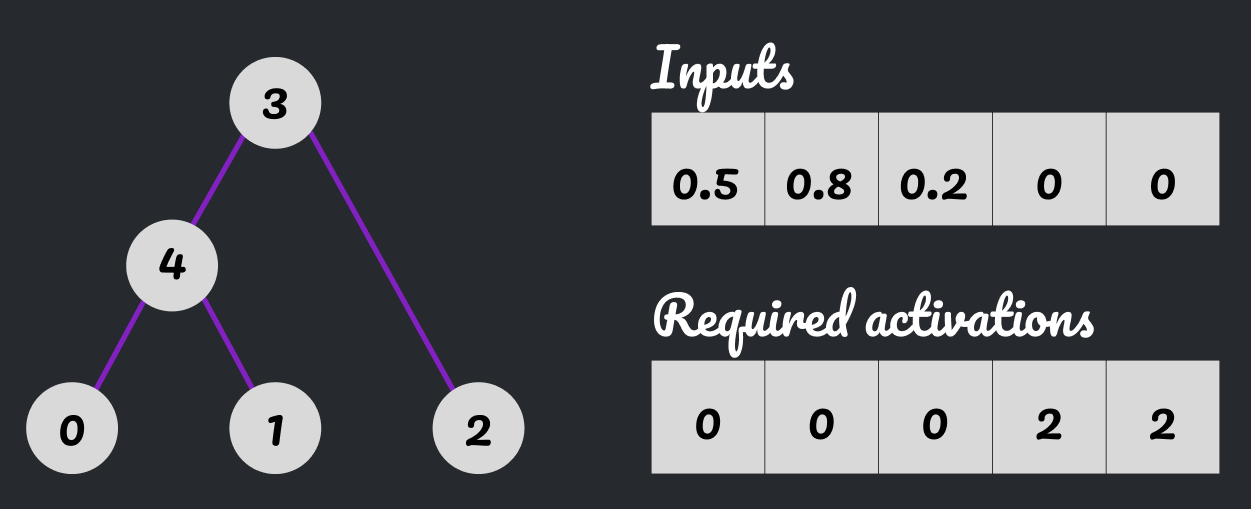
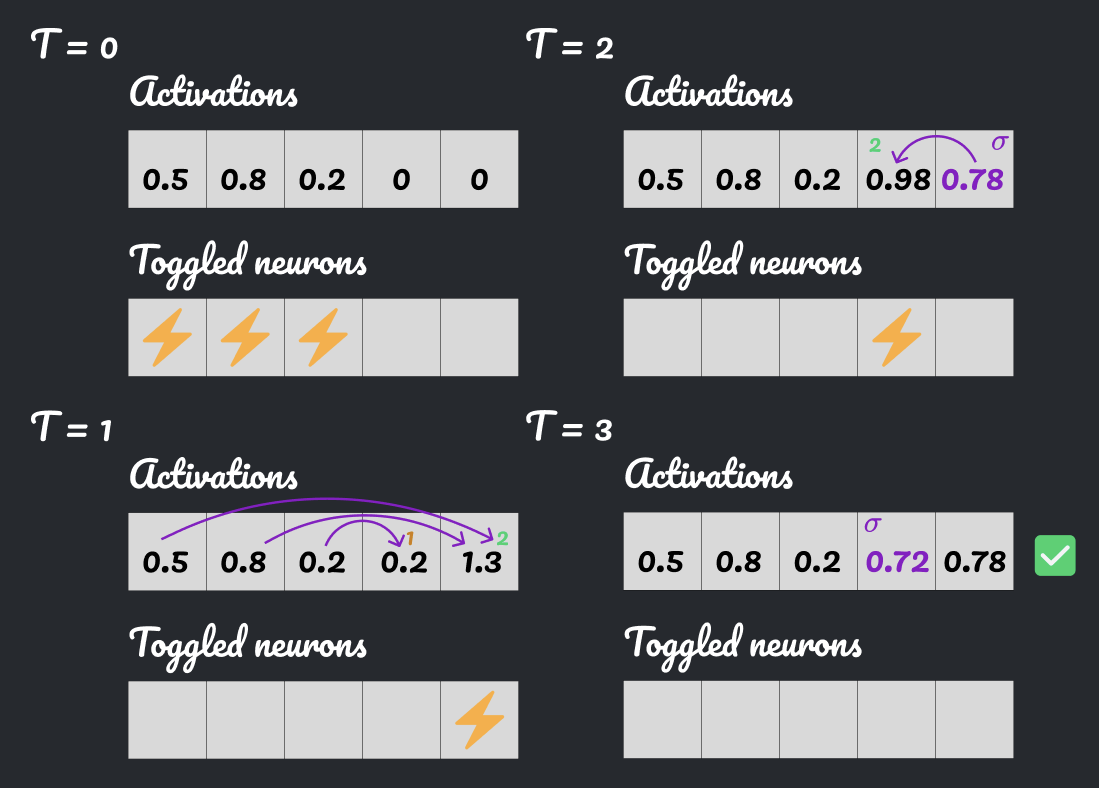

In [2]:
params = {"max_nodes": 100}

init_params = {
    "max_nodes": params["max_nodes"],
    "senders": jnp.array([0, 1, 2, 4]),
    "receivers": jnp.array([4, 4, 3, 3]),
    "weights": jnp.array([1, 1, 1, 1]),
    "activation_indices": jnp.array([0, 0, 0, 0, 0]),
    "node_types": jnp.array([0, 0, 0, 2, 1]),
    "inputs": jnp.array([0.5, 0.8, 0.2]),
    "output_size": 1,
}

In [3]:
activation_state, net = init(**init_params)
activation_state, output = forward(activation_state, net, params["max_nodes"], 1)
activation_state, output

(ActivationState(values=Array([0.5     , 0.8     , 0.2     , 0.985835, 0.785835, 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.     

In [4]:
assert

SyntaxError: invalid syntax (2389114725.py, line 1)

In [5]:
from neat_jax import get_active_connections, forward_toggled_nodes, toggle_receivers

In [14]:
max_nodes = 8  # rename: max_connections

init_params = {
    "max_nodes": max_nodes,
    "senders": jnp.array([0, 1, 1, 2, 2, 4, 5, 5]),
    "receivers": jnp.array([4, 4, 5, 3, 5, 5, 3, 6]),
    "weights": jnp.array([1, 1, 1, 1, 1, 1, 1, 1]),
    "activation_indices": jnp.array([0, 0, 0, 0, 0, 0, 0]),
    "node_types": jnp.array([0, 0, 0, 2, 1, 1, 2]),
    "inputs": jnp.array([0.4, 0.3, 0.5]),
    "output_size": 2,
}

activation_state, net = init(**init_params)

jax.tree_map(lambda x: print(f'{x=}'), net)
activation_state.toggled

senders, receivers = get_active_connections(activation_state, net, max_nodes)
activation_state = forward_toggled_nodes(
    senders, receivers, activation_state, net
)
activation_state = toggle_receivers(activation_state, net, max_nodes)
jax.tree_map(lambda x: print(f'{x=}'), activation_state)